# test fonction neige sans glaciers

In [ ]:
# le chemin jusqu'au fichier
path_BCC_CSM2_reprojete = os.path.join("~/private-storage/interp_models_hist/", "BCC-CSM2-MR_hist_reprojete.nc")
path_interp_sftgif_BCC_CSM2 = os.path.join("~/private-storage/interp_sftgif", "BCC-CSM2-MR_sftgif_reprojete.nc")
path_areacella_BCC_CSM2_recalcule = os.path.join("~/private-storage/areacella_recalcule_cdo", "BCC-CSM2-MR_gridarea_hist_recalcule.nc")

# lecture du fichier
BCC_CSM2_reprojete = xr.open_dataset(path_BCC_CSM2_reprojete)
BCC_CSM2_reprojete
interp_sftgif_BCC_CSM2 = xr.open_dataset(path_interp_sftgif_BCC_CSM2)
interp_sftgif_BCC_CSM2
areacella_BCC_CSM2_recalcule = xr.open_dataset(path_areacella_BCC_CSM2_recalcule)
areacella_BCC_CSM2_recalcule

# sélection de la variable d'intérêt
snow_cover_ini_reprojete = BCC_CSM2_reprojete["snc"]
snow_cover_ini_reprojete
sftgif_reprojete = interp_sftgif_BCC_CSM2["sftgif"]
cell_area_ini_recalcule = areacella_BCC_CSM2_recalcule["cell_area"]

# applique le masque
glacier_mask_repro = sftgif_reprojete > 0
snow_cover_masked_repro = snow_cover_ini_reprojete.where(~glacier_mask_repro, other=np.nan)

#sélection de la période d'intérêt
snow_cover_masked_repro = snow_cover_masked_repro.sel(time=slice("1995", "2014"))

# groupby et moyenne
snow_cover_masked_repro = snow_cover_masked_repro.groupby("time.month").mean(dim="time")
monthly_mean_repro = snow_cover_masked_repro.mean(dim=("lat", "lon"))

# calcul de superficie
snow_cover_km2_recalcule = (snow_cover_masked_repro * (cell_area_ini_recalcule * 1e-6) ).groupby(snow_cover_masked_repro["month"]).sum(dim=["lat", "lon"], skipna=True)
print(snow_cover_km2_recalcule)
print(snow_cover_km2_recalcule.shape)

# les plot
plt.plot(range(1, 13), monthly_mean_repro, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

plt.plot(range(1, 13), snow_cover_km2_recalcule, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [1]:
import xarray as xr
import os

def get_data(file_path, variable_name):
    # Vérification que le chemin existe et charger le fichier
    #if not os.path.exists(os.path.expanduser(file_path)):
        #raise FileNotFoundError(f"Le fichier {file_path} n'a pas été trouvé.")
    
    # Ouvrir le fichier NetCDF
    ds = xr.open_dataset(os.path.expanduser(file_path))
    
    # Vérifier si la variable existe dans le fichier
    #if variable_name not in ds:
        #raise KeyError(f"Variable '{variable_name}' non trouvée dans le fichier {file_path}.")
    
    return ds[variable_name]

In [11]:
models = [
    "BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CESM2", "CESM2-WACCM", "CIESM",
    "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg",
    "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GISS-E2-1-G", "HadGEM3-GC31-LL",
    "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"
]

In [22]:
# chemins
for model in models:
    path_BCC_CSM2_reprojete = os.path.join("~/private-storage/interp_models_hist/", f"{model}_hist_reprojete.nc")
    path_interp_sftgif_BCC_CSM2 = os.path.join("~/private-storage/interp_sftgif", f"{model}_sftgif_reprojete.nc")
    path_areacella_BCC_CSM2_recalcule = os.path.join("~/private-storage/areacella_recalcule_cdo", f"{model}_gridarea_hist_recalcule.nc")

# variables d'intérêt 
snow_cover_ini_reprojete = get_data(path_BCC_CSM2_reprojete, "snc")
sftgif_reprojete = get_data(path_interp_sftgif_BCC_CSM2, "sftgif")
cell_area_ini_recalcule = get_data(path_areacella_BCC_CSM2_recalcule, "cell_area")

print(snow_cover_ini_reprojete)
print(sftgif_reprojete)
print(cell_area_ini_recalcule)

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
<xarray.DataArray 'sftgif' (lat: 180, lon: 360)> Size: 259kB
[64800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
<xarray.DataArray 'cell_area' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2


In [ ]:
# pour les fichiers initiaux

In [61]:
path_GFDL_CM4 = os.path.join("~/private-storage/historical-LImon-snc/", "snc_LImon_GFDL-CM4_historical_r1i1p1f1_gr1_185001-201412.nc")
path_sftgif_GFDL_CM4 = os.path.join("~/private-storage/masques/masques/sftgif", "sftgif_GFDL-CM4.nc")
path_areacella_GFDL_CM4 = os.path.join("~/private-storage/masques/masques/areacella", "areacella_GFDL-CM4.nc")

# variables d'intérêt 
snow_cover_ini = get_data(path_GFDL_CM4, "snc")
sftgif = get_data(path_sftgif_GFDL_CM4, "sftgif")
cell_area_ini = get_data(path_areacella_GFDL_CM4, "areacella")

print(snow_cover_ini)
print(sftgif)
print(cell_area_ini)

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 288)> Size: 411MB
[102643200 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:        Snow Area Fraction
    units:            %
    cell_methods:     area: time: mean
    ocean_fillvalue:  0.0
    cell_measures:    area: areacella
    standard_name:    surface_snow_area_fraction
    interp_method:    conserve_order1
    original_name:    snc
    comment:          land_area = areacella * sftlf * 0.01
<xarray.DataArray 'sftgif' (lat: 180, lon: 288)> Size: 207kB
[51840 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
Attributes:
    long_name:     

In [62]:
# applique le masque
glacier_mask = sftgif > 0
snow_cover_masked = snow_cover_ini.where(~glacier_mask, other=np.nan)

#sélection de la période d'intérêt
snow_cover_masked = snow_cover_masked.sel(time=slice("1995", "2014"))

# groupby et moyenne
snow_cover_masked_groupby = snow_cover_masked.groupby("time.month").mean(dim="time")
monthly_mean = (snow_cover_masked_groupby/100).mean(dim=("lat", "lon"))

# calcul de superficie
snow_cover_km2 = ((snow_cover_masked_groupby  * (cell_area_ini * 1e-6))/100).groupby(snow_cover_masked_groupby["month"]).sum(dim=["lat", "lon"], skipna=True)
print(snow_cover_km2)
print(snow_cover_km2.shape)

<xarray.DataArray (month: 12)> Size: 48B
array([26461080.  , 26159032.  , 22594334.  , 15338644.  ,  7443840.  ,
        1454733.2 ,   274988.12,   238804.44,  1512571.1 ,  8057899.  ,
       16408739.  , 23489630.  ], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


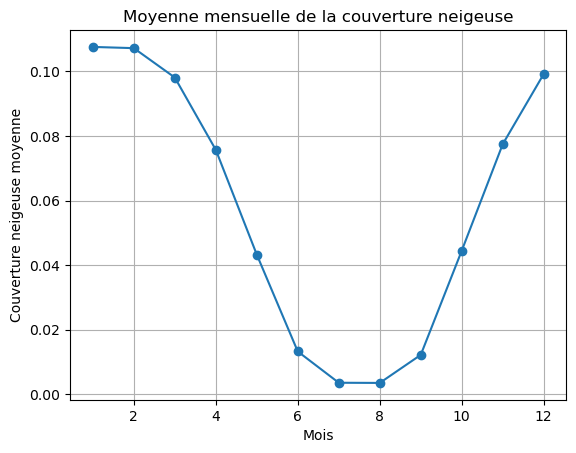

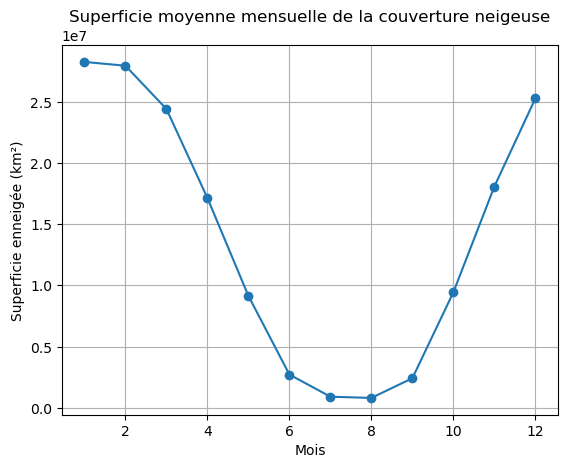

In [42]:
# les plot
plt.plot(range(1, 13), monthly_mean, marker="o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

plt.plot(range(1, 13), snow_cover_km2, marker="o")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

In [52]:
# pour les fichiers interpolés

path_GFDL_CM4_interp = os.path.join("~/private-storage/interp_models_hist_bis/", "GFDL-CM4_hist_reprojete.nc")
path_sftgif_GFDL_CM4_interp = os.path.join("~/private-storage/interp_sftgif_bis", "GFDL-CM4_sftgif_reprojete.nc")
path_areacella_GFDL_CM4_interp = os.path.join("~/private-storage/areacella_recalcule_cdo_bis", "GFDL-CM4_gridarea_hist_recalcule.nc")

# variables d'intérêt 
snow_cover_ini_interp = get_data(path_GFDL_CM4_interp, "snc")
sftgif_interp = get_data(path_sftgif_GFDL_CM4_interp, "sftgif")
cell_area_ini_interp = get_data(path_areacella_GFDL_CM4_interp, "cell_area")

print(snow_cover_ini_interp)
print(sftgif_interp)
print(cell_area_ini_interp)

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
<xarray.DataArray 'sftgif' (lat: 180, lon: 360)> Size: 259kB
[64800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
<xarray.DataArray 'cell_area' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2


In [44]:
import numpy as np

In [53]:
# applique le masque
glacier_mask_interp = sftgif_interp > 0
snow_cover_masked_interp = snow_cover_ini_interp.where(~glacier_mask_interp, other=np.nan)

#sélection de la période d'intérêt
snow_cover_masked_interp = snow_cover_masked_interp.sel(time=slice("1995", "2014"))

# groupby et moyenne
snow_cover_masked_interp_groupby = snow_cover_masked_interp.groupby("time.month").mean(dim="time")
monthly_mean_interp = (snow_cover_masked_interp_groupby/100).mean(dim=("lat", "lon"))

# calcul de superficie
snow_cover_km2_interp = ((snow_cover_masked_interp_groupby  * (cell_area_ini_interp * 1e-6))/100 ).groupby(snow_cover_masked_interp_groupby["month"]).sum(dim=["lat", "lon"], skipna=True)
print(snow_cover_km2_interp)
print(snow_cover_km2_interp.shape)

<xarray.DataArray (month: 12)> Size: 96B
array([35942273.39882736, 35579593.35761261, 31155556.77604751,
       21551654.81561719,  9956544.03704155,  1789220.37479999,
         312612.62535101,   277969.87570553,  1942001.820237  ,
       11173935.41297503, 22928237.86406834, 32169418.47804557])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
(12,)


In [46]:
snow_cover_ini_interp

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
array([[[99.68848, 99.68848, ..., 99.68848, 99.68848],
        [99.68848, 99.68848, ..., 99.68848, 99.68848],
        ...,
        [ 0.     ,  0.     , ...,  0.     ,  0.     ],
        [ 0.     ,  0.     , ...,  0.     ,  0.     ]],

       [[99.68848, 99.68848, ..., 99.68848, 99.68848],
        [99.68848, 99.68848, ..., 99.68848, 99.68848],
        ...,
        [ 0.     ,  0.     , ...,  0.     ,  0.     ],
        [ 0.     ,  0.     , ...,  0.     ,  0.     ]],

       ...,

       [[99.68848, 99.68848, ..., 99.68848, 99.68848],
        [99.68848, 99.68848, ..., 99.68848, 99.68848],
        ...,
        [ 0.     ,  0.     , ...,  0.     ,  0.     ],
        [ 0.     ,  0.     , ...,  0.     ,  0.     ]],

       [[99.68846, 99.68846, ..., 99.68846, 99.68846],
        [99.68846, 99.68846, ..., 99.68846, 99.68846],
        ...,
        [ 0.     ,  0.     , ...,  0.     ,  0.     ],
        [ 0.     ,  0.     , ...,  0.     ,  0.     ]]], dtype=float32)
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [47]:
import matplotlib.pyplot as plt

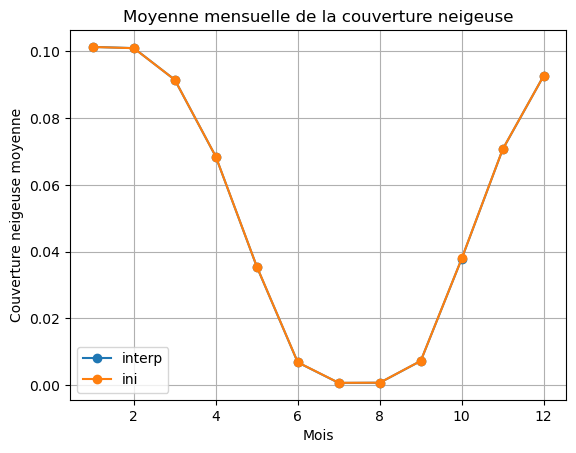

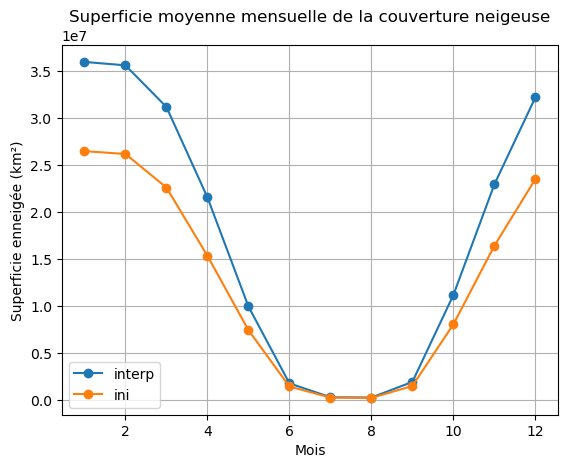

In [56]:
# les plot
plt.plot(range(1, 13), monthly_mean_interp, marker="o", label="interp")
plt.plot(range(1, 13), monthly_mean, marker="o", label="ini")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.legend()
plt.grid()
plt.show()

plt.plot(range(1, 13), snow_cover_km2_interp, marker="o", label="interp")
plt.plot(range(1, 13), snow_cover_km2, marker="o", label="ini")
plt.xlabel("Mois")
plt.ylabel("Superficie enneigée (km²)")
plt.title("Superficie moyenne mensuelle de la couverture neigeuse")
plt.legend()
plt.grid()
plt.show()

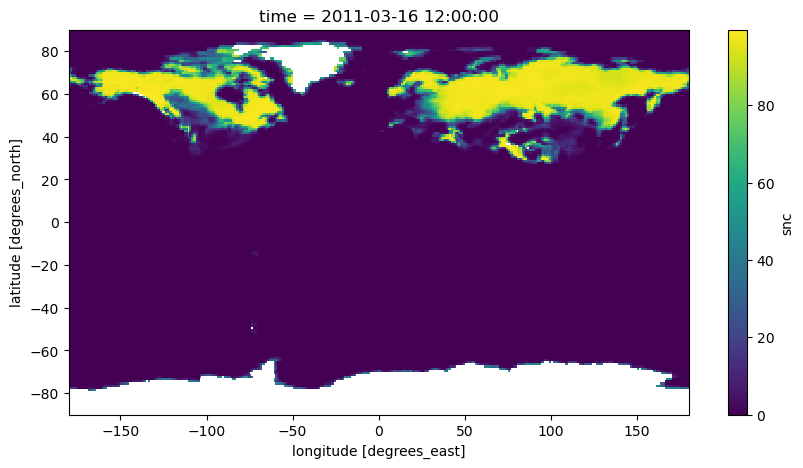

In [32]:
plt.figure(figsize=(10, 5))

snow_cover_masked_interp.isel(time=194).plot()

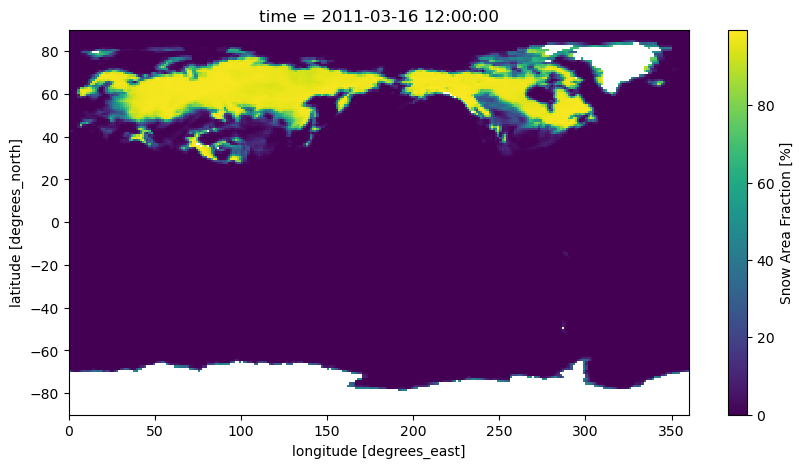

In [49]:
plt.figure(figsize=(10, 5))

snow_cover_masked.isel(time=194).plot()